In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-ori/animal_dataset_intermediate/Testing_set_animals.csv
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-QbIOirQ8fsVdawZeaAEZqQHaD4.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-ddMsmcHVNpt8sxZar6kYjQHaFi.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-C1k6jFd6j4m7biS1bTYd_AHaIA.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-7HEJdvGUI9VUVJBkESHoHQHaFj.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-AYMLW3fyj5-x6KHEjvCSoAHaEJ.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-VnIlJ2G-MxFc-SCdg3oy1wHaJA.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-faALlbULbQHYkDDyUAcRgwHaHc.jpeg
/kaggle/input/animal-ori/animal_dataset_intermediate/train/scoiattolo_train/OIP-cYeIlb8naXQcWSAuX6sHIwHaM6.jpeg
/kaggle/input/animal-ori/an

In [2]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D, AveragePooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.regularizers import l2
from keras.regularizers import l1
from tensorflow.keras import regularizers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

kernel_regularizer=tf.keras.regularizers.l2(0.01)
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

print(tf.__version__)

2.3.0


In [3]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#Start
train_data_path = '../input/animal1209/animal_dataset_intermediate_new/train_split/train'
test_data_path = '../input/animal1209/animal_dataset_intermediate_new/train_split/val'
img_rows = 150
img_cols = 150
epochs = 100
batch_size = 32
num_of_train_samples = 5736
num_of_test_samples = 2460

#Image Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')


Found 5736 images belonging to 5 classes.
Found 2460 images belonging to 5 classes.


Found 5736 files belonging to 5 classes.
Using 4589 files for training.


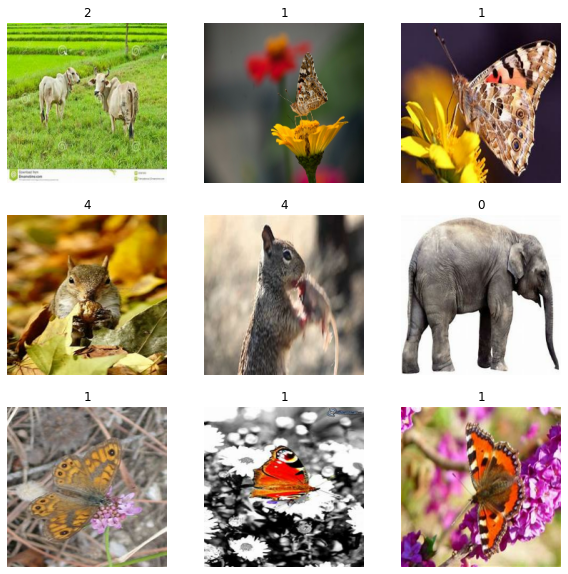

In [4]:

train_generator_2 = image_dataset_from_directory(
    directory=r"../input/animal1209/animal_dataset_intermediate_new/train_split/train",
    labels = "inferred", label_mode = 'int',
    validation_split = 0.2,
    subset = "training",
    seed = 1337,
    image_size=(224, 224),
    batch_size=32
)

#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_generator_2.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [5]:
#Define optimizer 

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
steps_per_epoch=STEP_SIZE_TRAIN 

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.005, decay_steps=steps_per_epoch*1000,decay_rate=1,staircase=False)

optimizer_2 = SGD(lr_schedule)
optimizer= SGD(lr = 0.01)

In [6]:
# Define  Callbacks 

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
callbacks=[reduce_lr]

earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

In [7]:
#MLP model 62%/42%

model3 = Sequential()
#input layer size is 784 after flattening
model3.add(Flatten(input_shape=(224, 224, 3)))
  
#hidden layer with 512 neurons
model3.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model3.add(Dropout(0.5))
model3.add(BatchNormalization())
model3.add(Dense(5, activation='softmax'))

model3.summary()


# compile model
model3.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               77070848  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

In [8]:
# CNN model

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)       

In [9]:
#Train
model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)



Epoch 1/100
179/179 [==============================] - 66s 369ms/step - loss: 1.5114 - accuracy: 0.3345 - val_loss: 1.2841 - val_accuracy: 0.4938
Epoch 2/100
179/179 [==============================] - 57s 321ms/step - loss: 1.3601 - accuracy: 0.4334 - val_loss: 1.5260 - val_accuracy: 0.4568
Epoch 3/100
179/179 [==============================] - 56s 310ms/step - loss: 1.2800 - accuracy: 0.4769 - val_loss: 1.4287 - val_accuracy: 0.4963
Epoch 4/100
179/179 [==============================] - 56s 314ms/step - loss: 1.2247 - accuracy: 0.5011 - val_loss: 1.0081 - val_accuracy: 0.6246
Epoch 5/100
179/179 [==============================] - 57s 319ms/step - loss: 1.1825 - accuracy: 0.5265 - val_loss: 1.0627 - val_accuracy: 0.5958
Epoch 6/100
179/179 [==============================] - 58s 323ms/step - loss: 1.1574 - accuracy: 0.5351 - val_loss: 0.9727 - val_accuracy: 0.6451
Epoch 7/100
179/179 [==============================] - 57s 320ms/step - loss: 1.1224 - accuracy: 0.5514 - val_loss: 1.0110 -

In [10]:
model.save_weights('model.h5')

In [11]:

# TensorFlow and tf.keras

%load_ext tensorboard
import datetime
print(tf.__version__)

# run the tensorboard command to view the visualizations.

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.3.0


In [12]:
#Evaluate the model 
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model.evaluate(validation_generator,
steps=STEP_SIZE_VALID)

76/76 [==============================] - 9s 124ms/step - loss: 1.1981 - accuracy: 0.6682


[1.1980960369110107, 0.6681743264198303]

In [13]:

Y_pred = model.predict_generator(validation_generator, num_of_test_samples)
y_pred = np.argmax(Y_pred, axis=1)

y_pred[200]



2

In [14]:
y_pred.shape

(2460,)

In [15]:
predictions = [labels[i] for i in y_pred]
predictions

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32

In [16]:

target_names = ['elefante_train', 'farfalla_train', 'mucca_train','pecora_train','scoiattolo_train']
print(classification_report(validation_generator.labels, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

  elefante_train       0.15      0.24      0.18       390
  farfalla_train       0.22      0.26      0.24       571
     mucca_train       0.18      0.08      0.11       504
    pecora_train       0.22      0.26      0.24       492
scoiattolo_train       0.22      0.15      0.18       503

        accuracy                           0.20      2460
       macro avg       0.20      0.20      0.19      2460
    weighted avg       0.20      0.20      0.19      2460



In [17]:
#Extract the test data => I didnt find a way without creating a new folder on colab

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.)

test_generator = test_datagen.flow_from_directory("../input/animal-ori/animal_dataset_intermediate",
                                                    
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))

Found 9106 images belonging to 2 classes.


In [18]:
#prediction on test data 

num = 9106

Y_pred_test = model.predict_generator(test_generator)
y_pred_test = np.argmax(Y_pred_test, axis=1)
y_pred_test


array([3, 0, 3, ..., 4, 0, 1])

In [19]:
Y_pred_test

array([[2.80684978e-01, 1.41387613e-06, 2.34163061e-01, 4.59778190e-01,
        2.53723469e-02],
       [3.35117966e-01, 2.35048309e-03, 1.51400387e-01, 3.30449581e-01,
        1.80681571e-01],
       [1.50888428e-01, 7.47534856e-02, 1.93124592e-01, 3.77835780e-01,
        2.03397781e-01],
       ...,
       [1.69341996e-01, 1.03918284e-01, 6.34952933e-02, 1.62831947e-01,
        5.00412464e-01],
       [9.79005337e-01, 4.14870307e-03, 1.06420619e-02, 3.51710571e-03,
        2.68686260e-03],
       [1.31404296e-01, 5.13732731e-01, 2.93780476e-01, 5.21142259e-02,
        8.96834303e-03]], dtype=float32)

In [20]:
y_final = y_pred_test[0:910]

In [21]:
print(*y_final, sep = ", ")  

3, 0, 3, 0, 4, 1, 1, 1, 1, 0, 1, 3, 4, 4, 3, 1, 1, 4, 4, 2, 4, 1, 2, 0, 1, 1, 1, 1, 2, 0, 3, 4, 1, 3, 4, 1, 3, 1, 2, 0, 1, 1, 3, 1, 1, 0, 3, 0, 1, 0, 4, 1, 4, 1, 0, 0, 0, 4, 3, 2, 1, 1, 3, 0, 3, 0, 2, 2, 4, 0, 1, 4, 1, 4, 3, 0, 1, 0, 0, 0, 3, 3, 0, 4, 3, 3, 1, 1, 0, 0, 1, 3, 3, 1, 3, 4, 1, 1, 0, 1, 0, 3, 1, 3, 1, 0, 0, 1, 0, 3, 1, 4, 0, 1, 0, 3, 1, 1, 4, 1, 3, 3, 1, 1, 3, 0, 0, 0, 2, 4, 3, 1, 1, 0, 3, 0, 0, 0, 0, 1, 4, 4, 1, 1, 0, 3, 0, 1, 1, 1, 3, 1, 0, 0, 1, 2, 1, 4, 3, 0, 4, 1, 0, 3, 0, 1, 4, 3, 1, 4, 4, 3, 2, 3, 0, 0, 1, 3, 1, 0, 1, 0, 1, 3, 1, 3, 3, 3, 1, 0, 0, 0, 0, 4, 1, 1, 3, 1, 0, 3, 3, 1, 1, 1, 3, 1, 1, 0, 0, 1, 4, 3, 2, 2, 0, 0, 3, 4, 0, 1, 2, 0, 1, 3, 0, 1, 1, 3, 1, 2, 3, 3, 0, 2, 3, 0, 3, 1, 0, 0, 1, 2, 0, 4, 1, 3, 2, 1, 1, 0, 4, 1, 0, 0, 3, 1, 1, 3, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 4, 1, 3, 1, 1, 1, 3, 0, 4, 1, 0, 0, 3, 1, 2, 0, 0, 1, 1, 1, 0, 4, 0, 1, 4, 3, 3, 1, 4, 1, 0, 3, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 4, 4, 1, 1, 4, 3, 0, 1, 0, 4, 3, 3, 0, 3, 0, 3, 3, 4, 0, 0, 3

In [22]:
res = pd.DataFrame(y_final) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
 # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [23]:
res

,prediction
0,3
1,0
2,3
3,0
4,4
...,...
905,0
906,1
907,1
908,3


In [24]:
im = pd.read_csv('../input/animal-ori/animal_dataset_intermediate/Testing_set_animals.csv')
im



,filename,target
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN
...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,NaN
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,NaN
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,NaN
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,NaN


In [25]:
rei = pd.concat([im,res],  axis = 1) 

In [26]:
rei.drop('target', axis = 1)

,filename,prediction
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,3
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,0
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,3
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,0
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,4
...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,0
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,1
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,1
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,3


In [27]:
rei['animal'] = rei['prediction'] 
rei

,filename,target,prediction,animal
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN,3,3
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN,0,0
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN,3,3
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN,0,0
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN,4,4
...,...,...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,NaN,0,0
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,NaN,1,1
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,NaN,1,1
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,NaN,3,3


In [28]:
rei['animal'] =rei['animal'].replace(to_replace=2,value = "mucca") 

In [29]:
rei.head(100)

,filename,target,prediction,animal
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN,3,3
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN,0,0
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN,3,3
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN,0,0
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN,4,4
...,...,...,...,...
95,e834b20820f1033ed1584d05fb1d4e9fe777ead218ac10...,NaN,4,4
96,e834b20e2ef7073ed1584d05fb1d4e9fe777ead218ac10...,NaN,1,1
97,e834b20f28fd003ed1584d05fb1d4e9fe777ead218ac10...,NaN,1,1
98,e834b3072af6033ed1584d05fb1d4e9fe777ead218ac10...,NaN,0,0


In [30]:
rei['animal'] =rei['animal'].replace(to_replace=3,value = "pecora") 

In [31]:

rei['animal'] =rei['animal'].replace(to_replace=4,value = "scoiattolo") 

In [32]:
rei['animal'] =rei['animal'].replace(to_replace=0,value = "elefante") 

In [33]:
rei

,filename,target,prediction,animal
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN,3,pecora
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN,0,elefante
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN,3,pecora
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN,0,elefante
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN,4,scoiattolo
...,...,...,...,...
905,OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg,NaN,0,elefante
906,OIP-5VwIBS0B8SxZbUiAHBJg7gHaE8.jpeg,NaN,1,1
907,OIP-5WG0rHWAZYtu0utoZfuaAgHaFj.jpeg,NaN,1,1
908,OIP-5ZwfeYunG6CT2wEI7OjybQHaEo.jpeg,NaN,3,pecora


In [34]:
rei['animal'] =rei['animal'].replace(to_replace=1,value = "farfalla") 

In [35]:
rei.head(200)

,filename,target,prediction,animal
0,e030b20928e90021d85a5854ee454296eb70e3c818b413...,NaN,3,pecora
1,e030b20929e90021d85a5854ee454296eb70e3c818b413...,NaN,0,elefante
2,e030b2092be90021d85a5854ee454296eb70e3c818b413...,NaN,3,pecora
3,e030b2092ce90021d85a5854ee454296eb70e3c818b413...,NaN,0,elefante
4,e030b2092de90021d85a5854ee454296eb70e3c818b413...,NaN,4,scoiattolo
...,...,...,...,...
195,e83db40e2bf1053ed1584d05fb1d4e9fe777ead218ac10...,NaN,1,farfalla
196,e83db50920f4013ed1584d05fb1d4e9fe777ead218ac10...,NaN,3,pecora
197,e83db50a28f1073ed1584d05fb1d4e9fe777ead218ac10...,NaN,1,farfalla
198,e83db50d29f4073ed1584d05fb1d4e9fe777ead218ac10...,NaN,0,elefante


In [36]:
rei.to_csv('final')

In [37]:
y_final.shape

(910,)

In [38]:
#!pip install jovian --upgrade

In [39]:
#import jovian

In [40]:
#jovian.commit(project='Animal finale 2020')